<div style="text-align: center;">
    <h1 style="color: #4CAF50;"> Concrete Crack Detection </h1>
    <h2>Name: <strong>Subhraneil Das | PRN: 23070243053</strong></h2>
</div>
<hr>

About the Dataset:

The dataset contains concrete images having cracks. The data is collected from various METU Campus Buildings.
The dataset is divided into two as negative and positive crack images for image classification. 
Each class has 20000 images with a total of 40000 images with 227 x 227 pixels with RGB channels. 

Dataset Link: https://data.mendeley.com/datasets/5y9wdsg2zt/2

## Importing the Libraries

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

## Splitting the dataset into training and validation

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define paths
dataset_dir = r'C:\Users\admin\Downloads\Concrete Crack Images for Classification'
train_dir = r'C:\Users\admin\Downloads\Concrete Crack Images for Classification\train'
val_dir = r'C:\Users\admin\Downloads\Concrete Crack Images for Classification\validation'

# Create new directories for train and validation
os.makedirs(train_dir + '/negative', exist_ok=True)
os.makedirs(train_dir + '/positive', exist_ok=True)
os.makedirs(val_dir + '/negative', exist_ok=True)
os.makedirs(val_dir + '/positive', exist_ok=True)

# Get list of images from the negative and positive folders
negative_images = os.listdir(os.path.join(dataset_dir, 'negative'))
positive_images = os.listdir(os.path.join(dataset_dir, 'positive'))

# Split the data (80% training, 20% validation)
train_neg, val_neg = train_test_split(negative_images, test_size=0.2, random_state=42)
train_pos, val_pos = train_test_split(positive_images, test_size=0.2, random_state=42)

# Function to move images to respective directories
def move_images(images, source_dir, dest_dir):
    for img in images:
        src_path = os.path.join(source_dir, img)
        dest_path = os.path.join(dest_dir, img)
        shutil.move(src_path, dest_path)

# Move negative images
move_images(train_neg, os.path.join(dataset_dir, 'negative'), os.path.join(train_dir, 'negative'))
move_images(val_neg, os.path.join(dataset_dir, 'negative'), os.path.join(val_dir, 'negative'))

# Move positive images
move_images(train_pos, os.path.join(dataset_dir, 'positive'), os.path.join(train_dir, 'positive'))
move_images(val_pos, os.path.join(dataset_dir, 'positive'), os.path.join(val_dir, 'positive'))

print("Dataset has been split into training and validation sets.")

In [7]:
# Set dataset paths 
train_dir = r'C:\Users\admin\Downloads\Concrete Crack Images for Classification\train'
val_dir = r'C:\Users\admin\Downloads\Concrete Crack Images for Classification\validation'

In [8]:
# Set up image data generators
train_datagen = ImageDataGenerator(rescale=1./255)  # Normalizing pixel values
val_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
# Load training and validation datasets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150
    batch_size=32,
    class_mode='binary'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


## Model Building

In [12]:
# Define the CNN model
model = models.Sequential()

# Add layers
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Summary of the model

In [13]:
# Display model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

## Early-Stopping

In [14]:
# Set up early stopping and model checkpoint callbacks
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    callbacks=[early_stopping]
)

Epoch 1/20


1000/1000 [==============================] - 581s 579ms/step - loss: 0.0779 - accuracy: 0.9717 - val_loss: 0.0338 - val_accuracy: 0.9909
Epoch 2/20
1000/1000 [==============================] - 335s 335ms/step - loss: 0.0307 - accuracy: 0.9906 - val_loss: 0.0257 - val_accuracy: 0.9923
Epoch 3/20
1000/1000 [==============================] - 362s 362ms/step - loss: 0.0203 - accuracy: 0.9939 - val_loss: 0.0143 - val_accuracy: 0.9961
Epoch 4/20
1000/1000 [==============================] - 371s 371ms/step - loss: 0.0159 - accuracy: 0.9954 - val_loss: 0.0201 - val_accuracy: 0.9944
Epoch 5/20
1000/1000 [==============================] - 342s 341ms/step - loss: 0.0151 - accuracy: 0.9958 - val_loss: 0.0166 - val_accuracy: 0.9955
Epoch 6/20
1000/1000 [==============================] - 363s 363ms/step - loss: 0.0075 - accuracy: 0.9979 - val_loss: 0.0255 - val_accuracy: 0.9942
Epoch 7/20
1000/1000 [==============================] - 399s 399ms/step - loss: 0.0124 - accuracy: 0.9968 - va

## Saving the model

In [15]:
# Save the model
model.save('cnn_concrete_crack_classifier.h5')

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Metrics

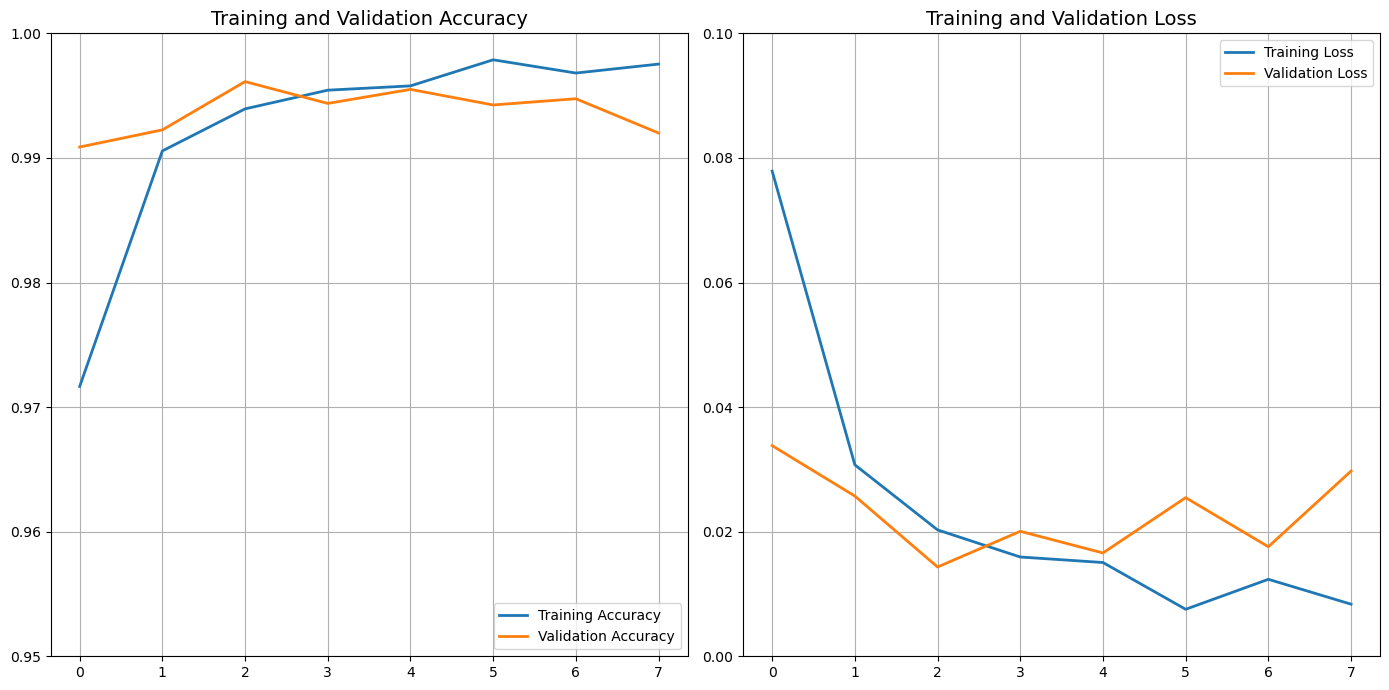

In [26]:
# Increase the range and improve plot aesthetics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(14, 7))

# Plot Training and Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', linewidth=2)
plt.plot(epochs_range, val_acc, label='Validation Accuracy', linewidth=2)
plt.ylim(0.95, 1.0)  # Adjust y-axis limits for better clarity
plt.legend(loc='lower right')
plt.grid(True)
plt.title('Training and Validation Accuracy', fontsize=14)

# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', linewidth=2)
plt.plot(epochs_range, val_loss, label='Validation Loss', linewidth=2)
plt.ylim(0, 0.1)  # Adjust y-axis limits to show more range
plt.legend(loc='upper right')
plt.grid(True)
plt.title('Training and Validation Loss', fontsize=14)

plt.tight_layout()
plt.show()

In [27]:
# Evaluate on training set
train_loss, train_acc = model.evaluate(train_generator)
print(f"Training Accuracy: {train_acc*100:.2f}%")

# Evaluate on validation set
val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation Accuracy: {val_acc*100:.2f}%")

1000/1000 [==============================] - 166s 166ms/step - loss: 0.0074 - accuracy: 0.9979
Training Accuracy: 99.79%
250/250 [==============================] - 41s 165ms/step - loss: 0.0143 - accuracy: 0.9961
Validation Accuracy: 99.61%


## Prediction on Random 5 Images

In [28]:
# Predict on validation set and generate confusion matrix & classification report
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=1,
    class_mode='binary',
    shuffle=False
)

# Get predictions and true labels
predictions = model.predict(val_generator)
pred_labels = np.round(predictions)
true_labels = val_generator.classes

# Confusion matrix and classification report
cm = confusion_matrix(true_labels, pred_labels)
cr = classification_report(true_labels, pred_labels, target_names=['Negative', 'Positive'])

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)

Found 8000 images belonging to 2 classes.
8000/8000 [==============================] - 83s 10ms/step
Confusion Matrix:
 [[3991    9]
 [  22 3978]]

Classification Report:
               precision    recall  f1-score   support

    Negative       0.99      1.00      1.00      4000
    Positive       1.00      0.99      1.00      4000

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000



1/1 [==============================] - 0s 104ms/step


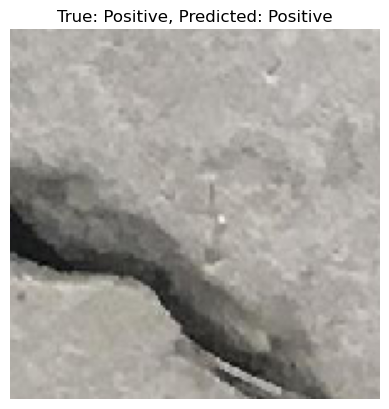

1/1 [==============================] - 0s 78ms/step


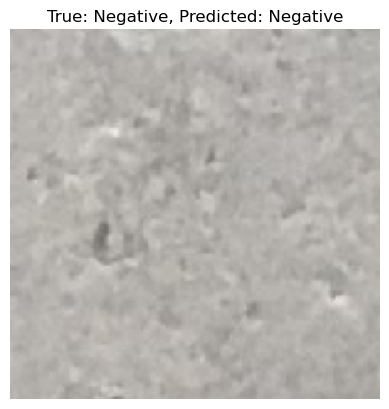

1/1 [==============================] - 0s 87ms/step


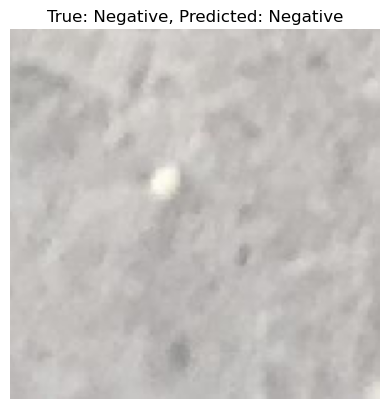

1/1 [==============================] - 0s 73ms/step


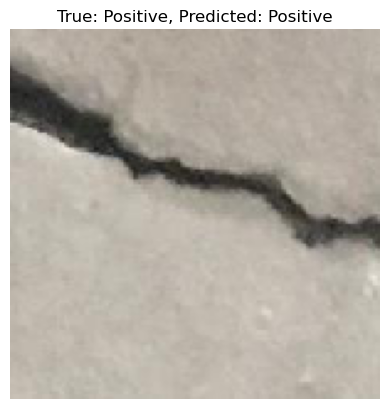

1/1 [==============================] - 0s 83ms/step


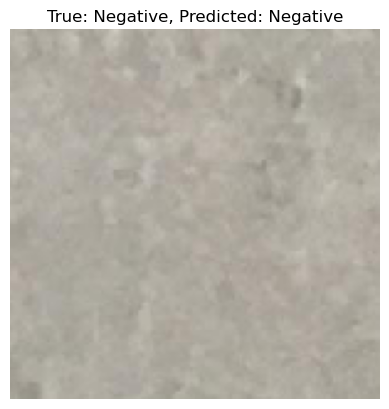

In [29]:
import numpy as np
import random

# Display 5 random sample predictions
for _ in range(5):  # Loop for 5 predictions
    # Generate a random index within the range of the validation dataset
    rand_index = random.randint(0, len(val_generator) - 1)
    
    # Load a batch of images and their true labels
    img_batch, label_batch = val_generator[rand_index]
    
    # Get a random image from the batch
    rand_img_index = random.randint(0, len(img_batch) - 1)
    img = img_batch[rand_img_index]
    label = label_batch[rand_img_index]

    # Predict the label for the image
    pred = model.predict(np.expand_dims(img, axis=0))  # Expand dimensions for prediction
    predicted_class = 'Positive' if pred >= 0.5 else 'Negative'
    true_class = 'Positive' if label == 1 else 'Negative'

    # Display the image and the prediction
    plt.imshow(img)
    plt.title(f"True: {true_class}, Predicted: {predicted_class}")
    plt.axis('off')
    plt.show()